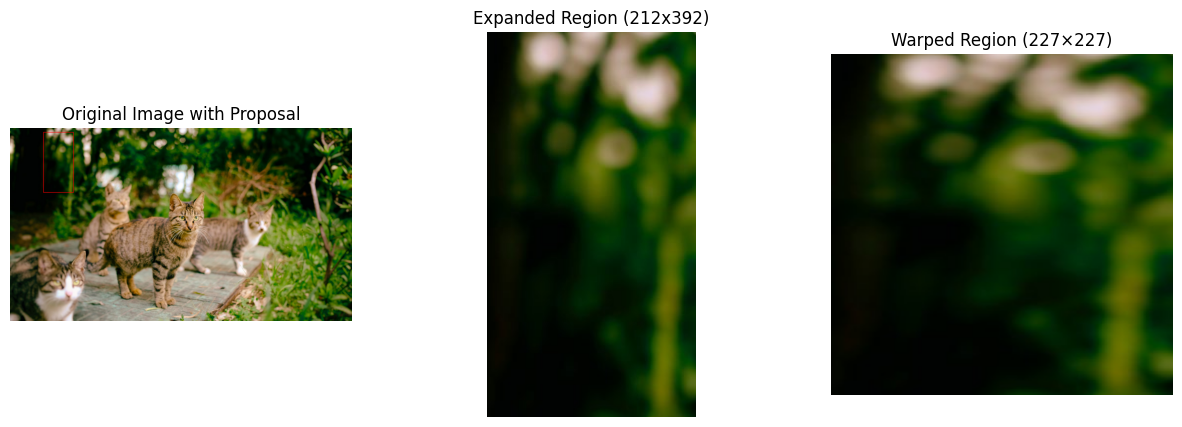

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 원본 이미지 로드
image = cv2.imread("sample.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR -> RGB

# Region Proposal 설정
x, y, w, h = 200, 25, 180, 360  # 예제 Region Proposal 좌표 및 크기

# Bounding Box 확장 (p=16)
p = 16  # 확장할 픽셀 수
x_exp, y_exp = max(0, x - p), max(0, y - p)  # 확장된 좌표 (경계를 벗어나지 않도록)
w_exp, h_exp = w + 2 * p, h + 2 * p  # 확장된 너비와 높이

# Bounding Box 자르기
expanded_region = image[y_exp:y_exp + h_exp, x_exp:x_exp + w_exp]

# Image Warping (227×227 크기로 변환)
warped_region = cv2.resize(expanded_region, (227, 227))

# 시각화 (원본 이미지 with Bounding Box + Expanded Region + Warped Image)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# 원본 이미지에 Bounding Box 표시
image_with_box = image.copy()
cv2.rectangle(image_with_box, (x, y), (x + w, y + h), (255, 0, 0), 2)

# 원본 이미지 + Bounding Box
ax[0].imshow(image_with_box)
ax[0].set_title("Original Image with Proposal")
ax[0].axis("off")

# 확장된 Region Proposal
ax[1].imshow(expanded_region)
ax[1].set_title(f"Expanded Region ({w_exp}x{h_exp})")
ax[1].axis("off")

# Warped 이미지 (227×227)
ax[2].imshow(warped_region)
ax[2].set_title("Warped Region (227×227)")
ax[2].axis("off")

plt.show()